# Analyzing results

You will use python and this jupyter notebook to plot and analyze the results obtained from the
fortran source code.

## Plotting results

For this we will use the `numpy` and `matplotlib.pyplot` packages

In [7]:
# Importing numpy and matplotlib
import numpy as np 
import matplotlib.pyplot as plt
# different styles are predefined that give different appearance to the plots.
# This one emulates the style of the figures you'll find on statisical 
# analysis news site fivethirtyeight.com
plt.style.use('fivethirtyeight')

In [8]:
# reading data stored in results.dat

file_name = 'results.dat'

# np.loadtxt reads all the data in a file and stores them in an array (assuming it's all floats)
# we use skiprows=1 to avoid the header
# unpack=True transposes the array in order to be able to extract each column individually 
all_data = np.loadtxt(file_name, skiprows=1, unpack=True)

h_step = all_data[0]
analytic = all_data[1]
three_point = all_data[2]
five_point = all_data[3]
# Each one of these is a numpy array that contains one of the columns in the results.dat file.
# This will allows us to make operations on the extracted data

### Plotting the derivatives first

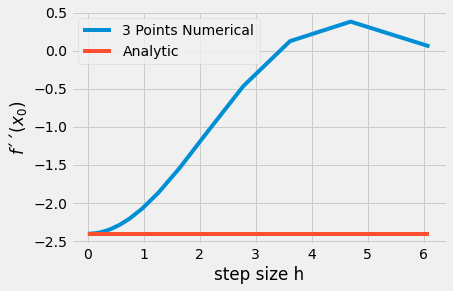

In [9]:
# The plot function can take two equally sized arrays,
# taking the first one as the x coordinates and the second one as the y coordinates
plt.plot(h_step, three_point, label='3 Points Numerical')
# plt.plot(h_step, five_point, label='5 Points Numerical')
plt.plot(h_step, analytic, label='Analytic')
plt.xlabel('step size h')
# Strings can take LaTeX syntaxis and interpret it correctly by putting an 'r' right before it
plt.ylabel(r'$f´´(x_0)$')
# legend displays the labels given in each plot
plt.legend()
plt.show()

If you implemented the 5 points formula in you fortran code and uncommented the appropriate lines here you should be able to compare both approximations in this plot

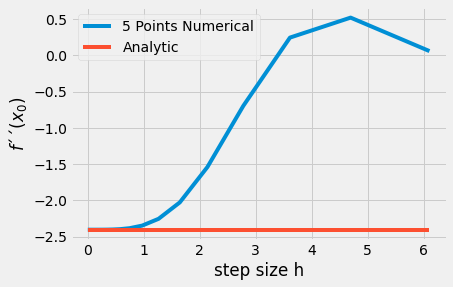

In [10]:
# The plot function can take two equally sized arrays,
# taking the first one as the x coordinates and the second one as the y coordinates
plt.plot(h_step, five_point, label='5 Points Numerical')
# plt.plot(h_step, five_point, label='5 Points Numerical')
plt.plot(h_step, analytic, label='Analytic')
plt.xlabel('step size h')
# Strings can take LaTeX syntaxis and interpret it correctly by putting an 'r' right before it
plt.ylabel(r'$f´´(x_0)$')
# legend displays the labels given in each plot
plt.legend()
plt.show()

### Plotting the errors
Now we will plot the error of the numerical formulas

In [11]:
# Operations between arrays of the same size are applied element-wise
three_point_error = np.absolute(analytic - three_point)
five_point_error = np.absolute(analytic - five_point)

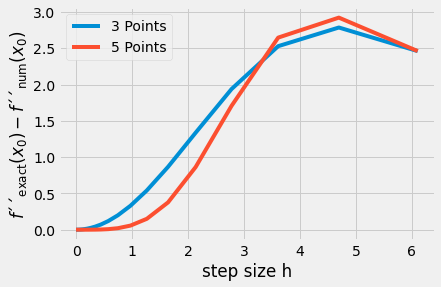

In [12]:
plt.plot(h_step, three_point_error, label='3 Points')
plt.plot(h_step, five_point_error, label='5 Points')
plt.xlabel('step size h')
plt.ylabel(r'$f´´_{\rm exact}(x_0) - f´´_{\rm num}(x_0)$')
plt.legend()
plt.show()

All we did was shift everything down to the $y=0$ axis. We're not getting much information out of it.

We expect the error $\Delta f''$ to go as a power of the step size $h$. 

$$ \Delta f'' = A h^n, $$

were $A$ is just some constant. Taking a logarithm on both sides of the equation results in

$$ \log(\Delta f'') = \log(A h^n) = \log(h^n) + \log(A) = n \log(h) + C,$$

where $C$ is just a constant renaming $\log(A)$. Therefore a log-log plot of the error should show a straight line. Let's see if that's the case

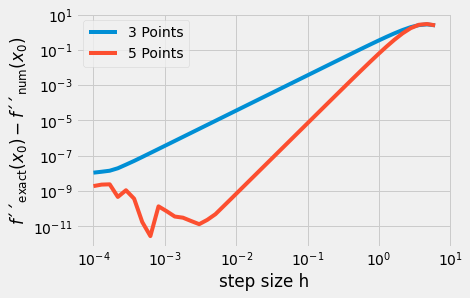

In [13]:
# For plotting we don't need to apply the log function ourselves; loglog takes care of that.
plt.loglog(h_step, three_point_error, label='3 Points')
plt.loglog(h_step, five_point_error, label='5 Points')
plt.xlabel('step size h')
plt.ylabel(r'$f´´_{\rm exact}(x_0) - f´´_{\rm num}(x_0)$')
plt.legend()
plt.show()

If you selected the right range for $h$ in your fortran code you should get straight lines in your log plot, but is the slope the correct one? Based on the lectures the error goes as $h^2$ for the 3 points formula and as $h^4$ for the five points formula. Therefore, the slopes should be 2 and 4. Tha can be verified with a simple linear regression

## Analyzing the data

There's several implementations of linear regression in python. We will use `linregress` from `scipy.stats`. You should check the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

In [26]:
# Importing only the stats package
from scipy import stats

In [27]:
# First we need to apply the log function to our data
log_h_step = np.log(h_step)
log_three_point_error = np.log(three_point_error)
log_five_point_error = np.log(five_point_error)

# I'll leave the rest of the implementation for you to do based on the documentation of stats.linregress 
# The example on the documentation should make it pretty clear how to extract the slope

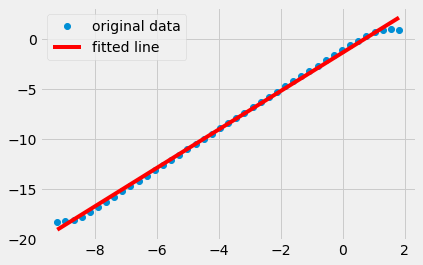

In [28]:
#Try the analyzing data for three point error
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(log_h_step, log_three_point_error)
plt.plot(log_h_step, log_three_point_error, 'o', label='original data')
plt.plot(log_h_step, intercept3 + slope3*log_h_step, 'r', label='fitted line')
plt.legend()
plt.show()

Is the  slope what we expected from the error in both numerical derivatives?

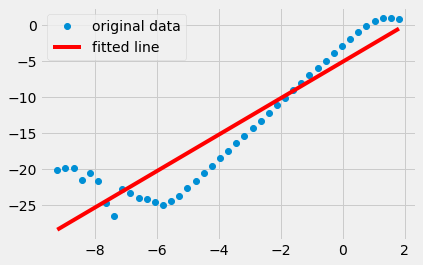

In [29]:
#Try the analyzing data for three point error
slope5, intercept5, r_value5, p_value5, std_err5 = stats.linregress(log_h_step, log_five_point_error)
plt.plot(log_h_step, log_five_point_error, 'o', label='original data')
plt.plot(log_h_step, intercept5 + slope5*log_h_step, 'r', label='fitted line')
plt.legend()
plt.show()